In [9]:
import pandas as pd
import numpy as np
from scipy import stats
from pydataset import data
import os
import env
import acquire
import prepare
import wrangle as w

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips,tax_rate
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,4270.398292
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,8275.011860
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,8161.339007
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,5816.593886
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,2711.917545


In [4]:
# reset index, then dropped index column
df = df.reset_index().drop('index',axis=1)

In [5]:
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips,tax_rate
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,4270.398292
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,8275.011860
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,8161.339007
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,5816.593886
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,2711.917545


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130214 entries, 0 to 2130213
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   bedrooms    float64
 1   bathrooms   float64
 2   sq_ft       float64
 3   tax_value   float64
 4   year        float64
 5   tax_amount  float64
 6   fips        float64
 7   tax_rate    float64
dtypes: float64(8)
memory usage: 130.0 MB


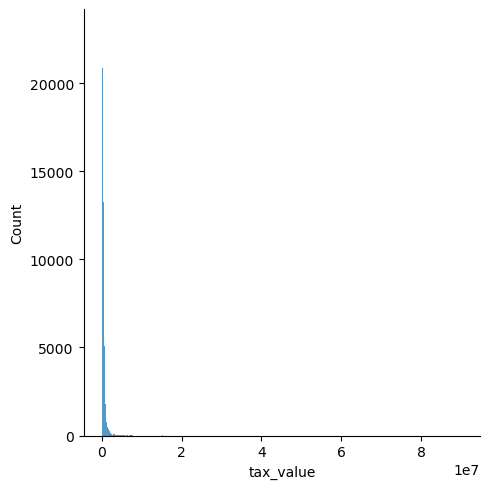

In [18]:
sns.displot(df.tax_value)

In [14]:
train, test = train_test_split(df, train_size=0.8, random_state=123)

In [15]:
train, validate = train_test_split(train, train_size = 0.7, random_state = 123)

In [16]:
train.shape, validate.shape, test.shape

((1192919, 8), (511252, 8), (426043, 8))

## Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

### Min Max Scaler

In [19]:
# create object
mm_scaler = MinMaxScaler()

In [21]:
# fit object
mm_scaler.fit(train[['sq_ft']])

MinMaxScaler()

In [42]:
# transform
mm_sqft = mm_scaler.transform(train[['sq_ft']])

In [43]:
mm_sqft[:10]

array([[0.00292779],
       [0.00284683],
       [0.00383908],
       [0.00345122],
       [0.00230458],
       [0.00394828],
       [0.00449807],
       [0.00282988],
       [0.00645056],
       [0.00403113]])

In [83]:
train['sq_ft']

549010     1556.0
1198359    1513.0
173441     2040.0
169434     1834.0
1980672    1225.0
            ...  
557881     1161.0
1516033    2042.0
739245     1280.0
247653      748.0
1321019    1472.0
Name: sq_ft, Length: 1192919, dtype: float64

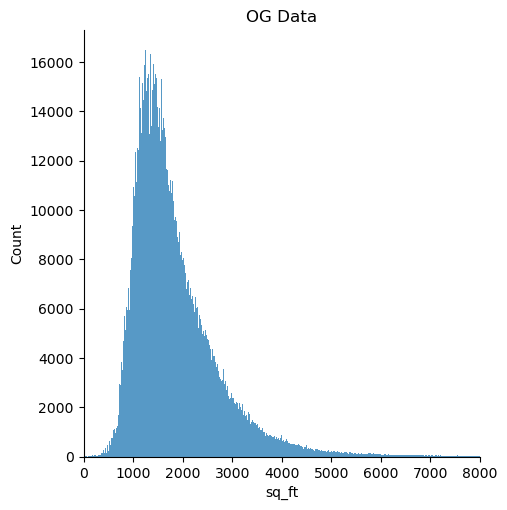

In [39]:
# Original Data displot
sns.displot(train['sq_ft'])
plt.xlim(0, 8000)
plt.title('OG Data')
plt.show()



Text(0.5, 1.0, 'Transformed Data')

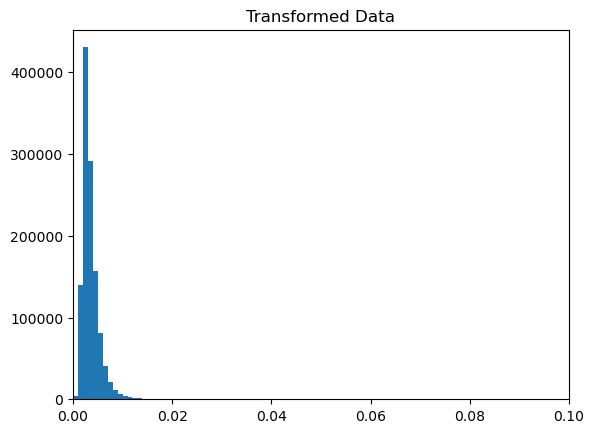

In [68]:
# Transformed Data, MinMax scaler not producing good results
plt.hist(mm_sqft, bins=1000)
plt.xlim(0,.1)
plt.title('Transformed Data')

In [25]:
# sq ft mean
df.sq_ft.mean()

1864.4578943711758

In [26]:
# sq ft median
df.sq_ft.median()

1624.0

In [33]:
# sq ft min, sq ft max
print(df.sq_ft.min())
print(df.sq_ft.max())

1.0
952576.0


### Standard Scaling

In [48]:
# create object
ss_scaler = StandardScaler()

In [49]:
# fit the object
ss_scaler.fit(train[['sq_ft']])

StandardScaler()

In [50]:
ss_sqft = ss_scaler.transform(train[['sq_ft']])

In [51]:
ss_sqft[:5]

array([[-0.28433439],
       [-0.32396252],
       [ 0.16171247],
       [-0.02813392],
       [-0.58937883]])

Text(0.5, 1.0, 'OG Data')

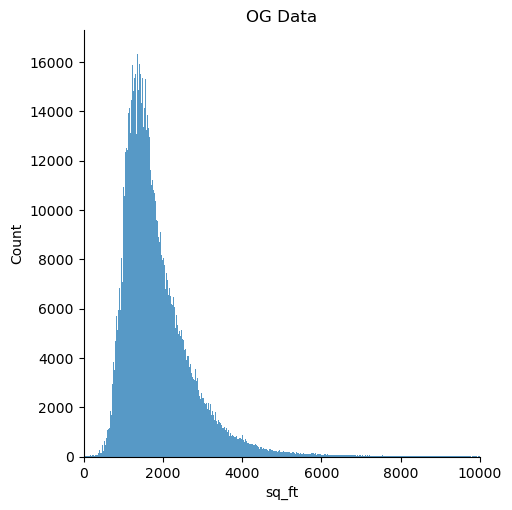

In [59]:
# plot 
sns.displot(train['sq_ft'])
plt.xlim(0,10000)
plt.title('OG Data')


Text(0.5, 1.0, 'Transformed Data')

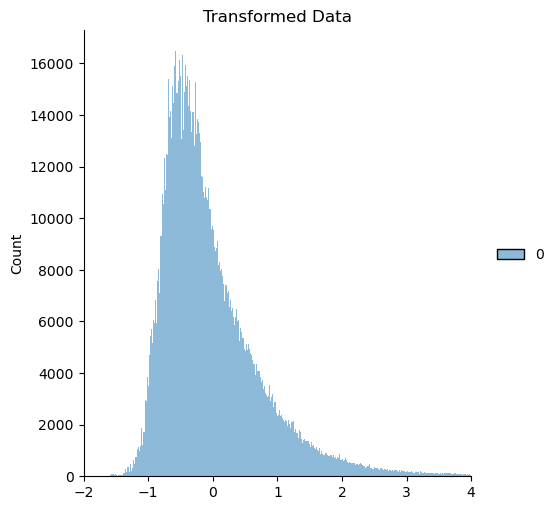

In [91]:
# plot
sns.displot(ss_sqft)
plt.xlim(-2,4)
plt.title('Transformed Data')

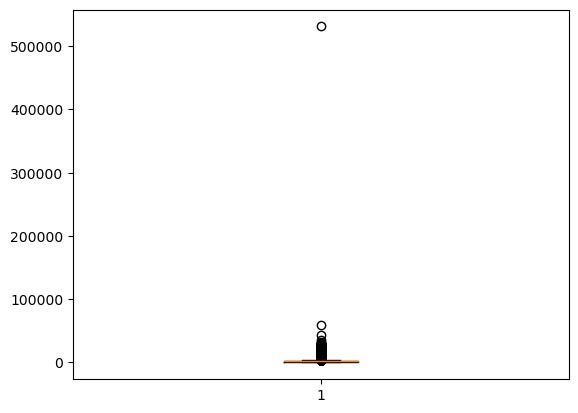

In [72]:
plt.boxplot(train['sq_ft'])
plt.show()

In [123]:
train.sq_ft.max()

531118.0

### Robust Scaler

In [73]:
# Create the object
rs_scaler = RobustScaler()

In [75]:
# fit the object
rs_scaler.fit(train[['sq_ft']])

RobustScaler()

In [76]:
# Transformed variable
rs_sqft = rs_scaler.transform(train[['sq_ft']])

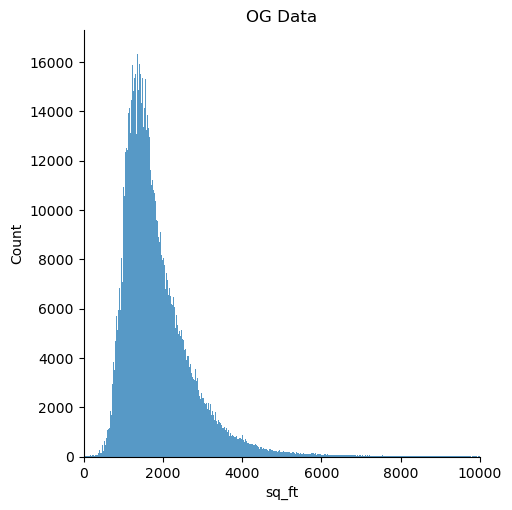

In [80]:
sns.displot(train.sq_ft)
plt.xlim(0,10000)
plt.title('OG Data')
plt.show()

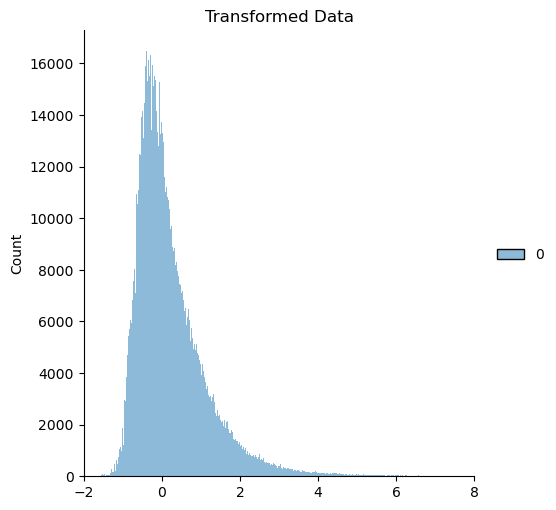

In [88]:
sns.displot(rs_sqft)
plt.xlim(-2,8)
plt.title('Transformed Data')
plt.show()

## Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [95]:
inversed = mm_scaler.inverse_transform(mm_sqft)

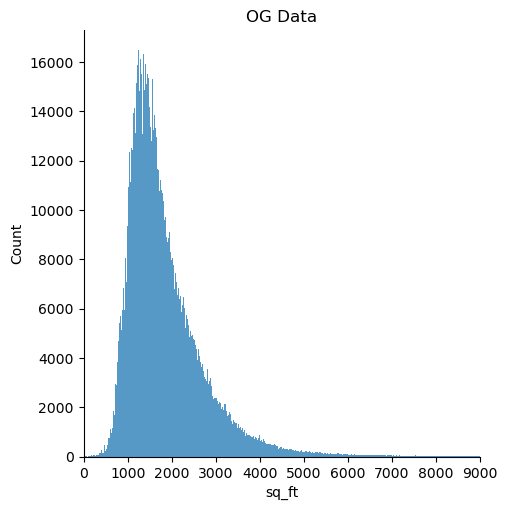

In [99]:
sns.displot(train['sq_ft'])
plt.xlim(0,9000)
plt.title('OG Data')
plt.show()

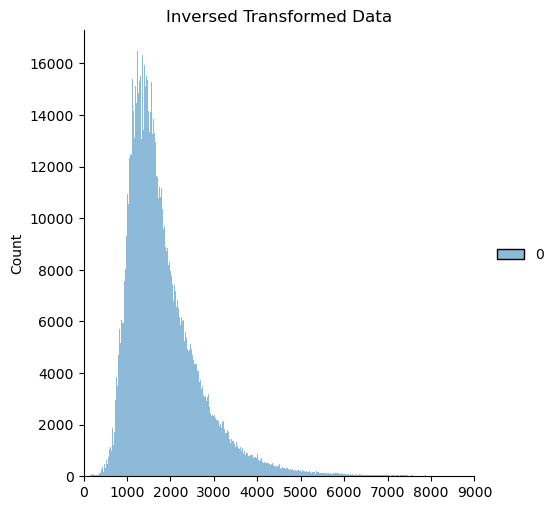

In [100]:
sns.displot(inversed)
plt.xlim(0,9000)
plt.title('Inversed Transformed Data')
plt.show()

In [98]:
inversed_ss = ss_scaler.inverse_transform(ss_sqft)

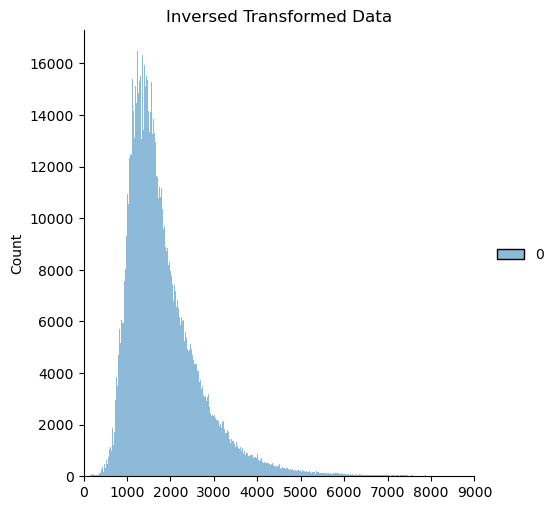

In [101]:
sns.displot(inversed_ss)
plt.xlim(0,9000)
plt.title('Inversed Transformed Data')
plt.show()

In [102]:
inversed_rs = rs_scaler.inverse_transform(rs_sqft)

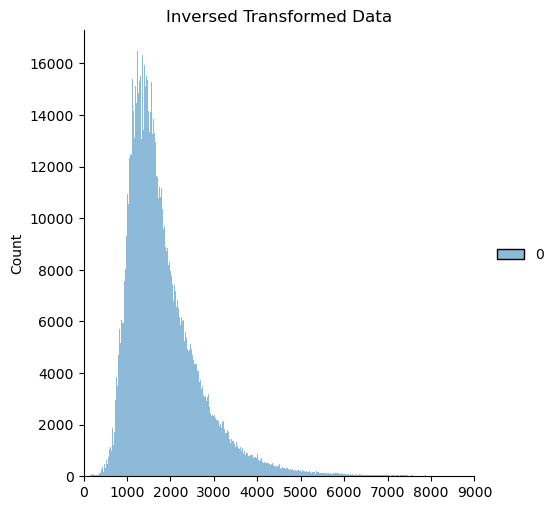

In [103]:
sns.displot(inversed_rs)
plt.xlim(0,9000)
plt.title('Inversed Transformed Data')
plt.show()

## Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [105]:
from sklearn.preprocessing import QuantileTransformer

In [111]:
# Create object
qt_scaler = QuantileTransformer(output_distribution='normal')

In [112]:
# fit object
qt_scaler.fit(train[['sq_ft']])

QuantileTransformer(output_distribution='normal')

In [113]:
# transform
qt_sqft = qt_scaler.transform(train[['sq_ft']])

In [114]:
qt_sqft[:5]

array([[-0.10810309],
       [-0.17782698],
       [ 0.51349142],
       [ 0.28613494],
       [-0.75466427]])

Text(0.5, 1.0, 'Quantile Transform')

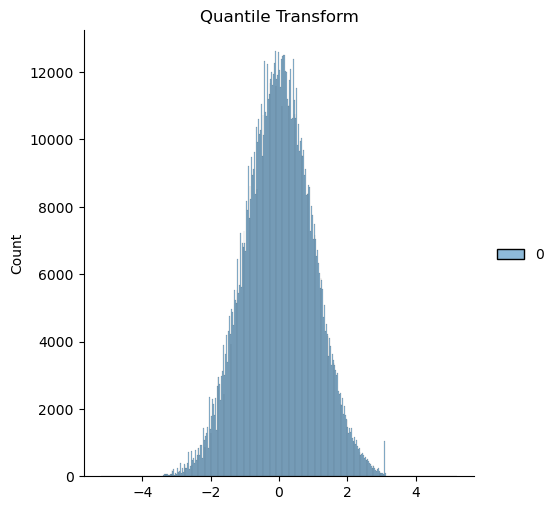

In [115]:
sns.displot(qt_sqft)
plt.title('Quantile Transform')

## Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [117]:
qt_scaler = QuantileTransformer()

In [118]:
qt_scaler.fit(train[['sq_ft']])

QuantileTransformer()

In [119]:
qt_sqft = qt_scaler.transform(train[['sq_ft']])

Text(0.5, 1.0, 'Quantile Transform')

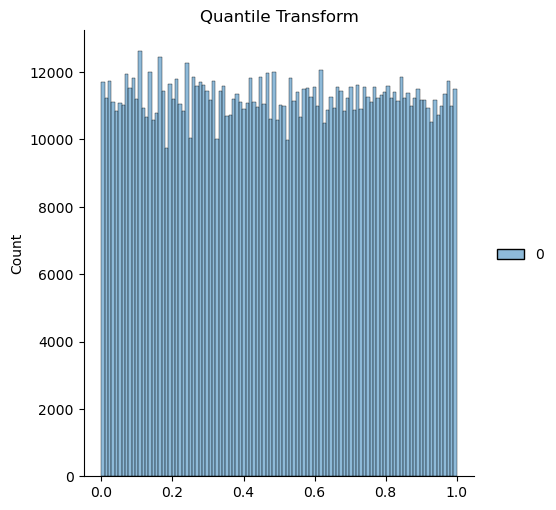

In [120]:
sns.displot(qt_sqft)
plt.title('Quantile Transform')

## Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def get_scaled(train, validate, test):
    
    mm_scaler = MinMaxScaler()

    mm_scaler.fit(train)
    scaled_train = mm_scaler.transform(train)

    mm_scaler.fit(validate)
    scaled_validate = mm_scaler.transform(validate)

    mm_scaler.fit(test)
    scaled_test = mm_scaler.transform(test)
    
    return scaled_train, scaled_validate, scaled_test